In [17]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

rc_={
    "figure.dpi":600,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
plt.rcParams.update(rc_)

from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)

In [2]:
bat_dc=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G1-bat-dc-pv0.5.xlsx'

In [3]:
def cal_relative(df):
    lower_bound=df[(df.strategy=="optimal")&(df.pred_model=="GT")]["OPEX"].values[0]
    upper_bound=df[(df.strategy=="MSC")&(df.pred_model=="GT")]["OPEX"].values[0]
    diff=upper_bound-lower_bound
    df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
    enhance=df[(df.p_grid_max_method=="by_execution")&(df.pred_model=="Simple")]["relative_OPEX"].values[0]-\
        df[(df.p_grid_max_method=="minimize_cap")&(df.pred_model=="Simple")]["relative_OPEX"].values[0]
    return enhance

In [4]:
def pivot_data(fn,keys,fn_add=None):
    all_df=pd.read_excel(fn,sheet_name="Sheet1",index_col=0)
    if fn_add!=None:
        add_df=pd.read_excel(fn_add,sheet_name="Sheet1",index_col=0)
        all_df=pd.concat([all_df,add_df]) 
    all_df=all_df.reindex()
    all_df["relative_OPEX"]=None
    grouped=all_df.groupby(by=keys).apply(cal_relative)
    grouped_ehance=pd.DataFrame(grouped)
    grouped_ehance=grouped_ehance.reset_index()
    if 'B_kWh' in keys:
        grouped_ehance['B_kWh']=grouped_ehance['B_kWh']/73.6
        grouped_ehance['B_kWh']=grouped_ehance['B_kWh'].round(0)
    if 'price_dc' in keys:  
        grouped_ehance['price_dc']=grouped_ehance['price_dc']*30
        grouped_ehance['price_dc']=grouped_ehance['price_dc'].round(0)
    data=grouped_ehance.pivot(index=keys[0],columns=keys[1])
    return data[0]

dc_bat=pivot_data(
    fn=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G1-bat-dc-pv0.5.xlsx',
    fn_add=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\bat_dc_0.xlsx',
    keys=['B_kWh','price_dc']
)
pv_dc=pivot_data(
    fn=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G3-bat6h-dc-pv.xlsx',
    fn_add=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\pv_dc_0.xlsx',
    keys=['pv_to_bld','price_dc']
)
bat_pv=pivot_data(
    fn=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G2-bat-dc0.6-pv.xlsx',
    fn_add=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\bat_pv_0.xlsx',
    keys=['B_kWh','pv_to_bld']
)

In [5]:
dc_bat

price_dc,0.0,3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0,27.0,30.0
B_kWh,,,,,,,,,,,
0.0,-0.133684,35.010044,69.490266,22.223050,62.220368,56.090194,51.338772,93.818578,65.083636,82.718870,48.708360
1.0,-0.057308,13.134361,34.645176,49.208396,62.957619,76.764332,84.499744,91.387880,97.564129,102.105991,106.563464
2.0,0.019824,5.830843,20.479639,30.370395,43.246350,59.470442,66.613703,74.416891,80.536619,85.170564,89.744165
3.0,0.098407,1.810090,10.299209,19.665519,31.182940,49.488088,56.192663,64.564090,70.550514,75.023097,79.797129
4.0,0.083305,-1.012248,7.686031,15.329318,26.340664,41.349776,49.978185,58.191870,63.594323,68.852976,73.714277
5.0,-0.044192,-2.429877,5.728578,12.555435,20.585695,33.057983,45.712907,50.378540,59.074480,63.740540,68.560572
6.0,0.225334,-2.133310,3.507454,10.409633,18.515386,30.334815,40.457951,46.317457,52.054015,59.606368,64.360011
7.0,-0.028177,-2.174961,0.562267,8.875905,16.407212,22.726867,31.816352,41.002527,49.192542,53.256266,59.632050
8.0,-0.082746,-1.814154,-2.364076,6.168625,11.538555,19.746581,29.023558,38.306210,44.425612,50.614862,57.404785


In [6]:
bat_pv.index=bat_pv.index.astype(int)
dc_bat.index=dc_bat.index.astype(int)
dc_bat=dc_bat.T
dc_bat.index=dc_bat.index.astype(int)
dc_bat=dc_bat.T
pv_dc=pv_dc.T
pv_dc.index=pv_dc.index.astype(int)
pv_dc=pv_dc.T

In [7]:
dc_bat.columns=dc_bat.columns.astype(int)

Text(0.5, 0.0, 'Relative regret OPEX improvement')

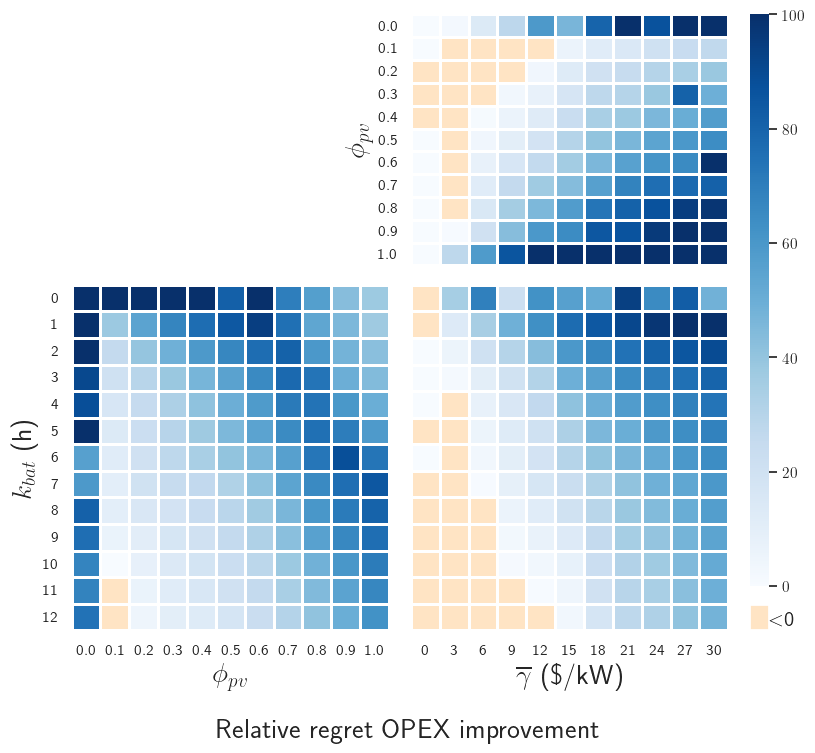

In [9]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(9, 8))  # 创建画布
grid = gridspec.GridSpec(3, 3,width_ratios=[1,1,0.06],height_ratios=[1,1.2,0.1])  # 设定2行*3列的网格
grid.update(wspace = 0.1, hspace = 0.1)
ax1 = fig.add_subplot(grid[0, 1])  # pv_dc
ax2 = fig.add_subplot(grid[1:3, 0])  # bat_pv
ax3 = fig.add_subplot(grid[1:3, 1])  # bat_dc
ax4 = fig.add_subplot(grid[0:2, 2])  # 第一行的全部列都添加到ax1中
ax5 = fig.add_subplot(grid[2, 2])  # 第一行的全部列都添加到ax1中
ax5.xaxis.set_ticks([])
ax5.yaxis.set_ticks([])
ax5.set_facecolor('bisque')
ax5.text(1,0.2,'$<$0',fontsize=15)

cmap=sns.color_palette("Blues", as_cmap=True)
#cmap.set_over('b')
cmap.set_under('bisque')

sns.heatmap(ax=ax1,data=pv_dc,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False,xticklabels=False) 
sns.heatmap(ax=ax2,data=bat_pv,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False) 
sns.heatmap(ax=ax3,data=dc_bat,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar_ax=ax4,yticklabels=False) 
'''sns.heatmap(ax=ax3, data=dc_bat, square=False, vmin=-5, vmax=100, cmap="RdBu", linewidths=1, cbar=False, yticklabels=False, \
    cbar_kws={"extend": "both", "extendfrac": 0, "extendrect": True, "ticks": [-0, 0, 100], "drawedges": True, \
        "boundaries": [-0, 100], "values": [-0, 100], "colors": ["black", "black"]})'''


ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax1.set_ylabel("$\phi_{pv}$",fontsize=20)
ax1.set_yticklabels(labels=ax1.get_yticklabels(),rotation=0)

ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.set_ylabel("$k_{bat} $ (h)",fontsize=20)
ax2.set_xlabel("$\phi_{pv}$",fontsize=20)
ax2.set_yticklabels(labels=ax2.get_yticklabels(),rotation=0)

ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax3.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)


sns.set(font_scale=1.5)
plt.suptitle("Relative regret OPEX improvement",y=0.0,fontsize=20)

In [12]:
pv_dc

price_dc,0,3,6,9,12,15,18,21,24,27,30
pv_to_bld,,,,,,,,,,,
0.0,0.012834,2.086696,13.557513,27.944886,59.056109,46.775044,80.007675,108.020716,87.070975,115.734588,102.762656
0.1,0.013620,-0.856895,-3.540079,-4.925782,-1.120376,6.031611,11.620509,14.761754,20.680394,23.874287,26.611172
0.2,-0.055244,-1.011184,-3.714467,-0.425515,3.538085,12.595719,20.142564,24.409887,30.203126,34.346233,38.354430
0.3,-0.017862,-1.280365,-1.602454,3.334208,7.801395,16.849028,27.359510,30.155088,38.430421,80.578922,49.325666
0.4,-0.021308,-1.840802,0.987257,6.150199,12.237629,23.455877,34.000769,38.068983,45.795938,50.570372,57.785238
0.5,0.008512,-2.083131,3.716537,10.464236,18.516280,30.319835,40.476463,46.392534,54.521099,59.558256,64.450809
0.6,0.069333,-2.632765,7.516960,16.363476,25.804180,36.316103,45.733179,55.836013,60.982487,64.962908,202.876925
0.7,0.047327,-2.865525,11.456469,25.508193,36.733413,43.622127,56.073259,68.136250,75.925622,77.692088,81.237396
0.8,0.195086,-2.138764,14.907599,35.453653,45.612447,58.008231,73.110542,80.611481,86.747572,94.586550,98.041446


Text(0.5, -0.08, 'VoI* improvement (\\%)')

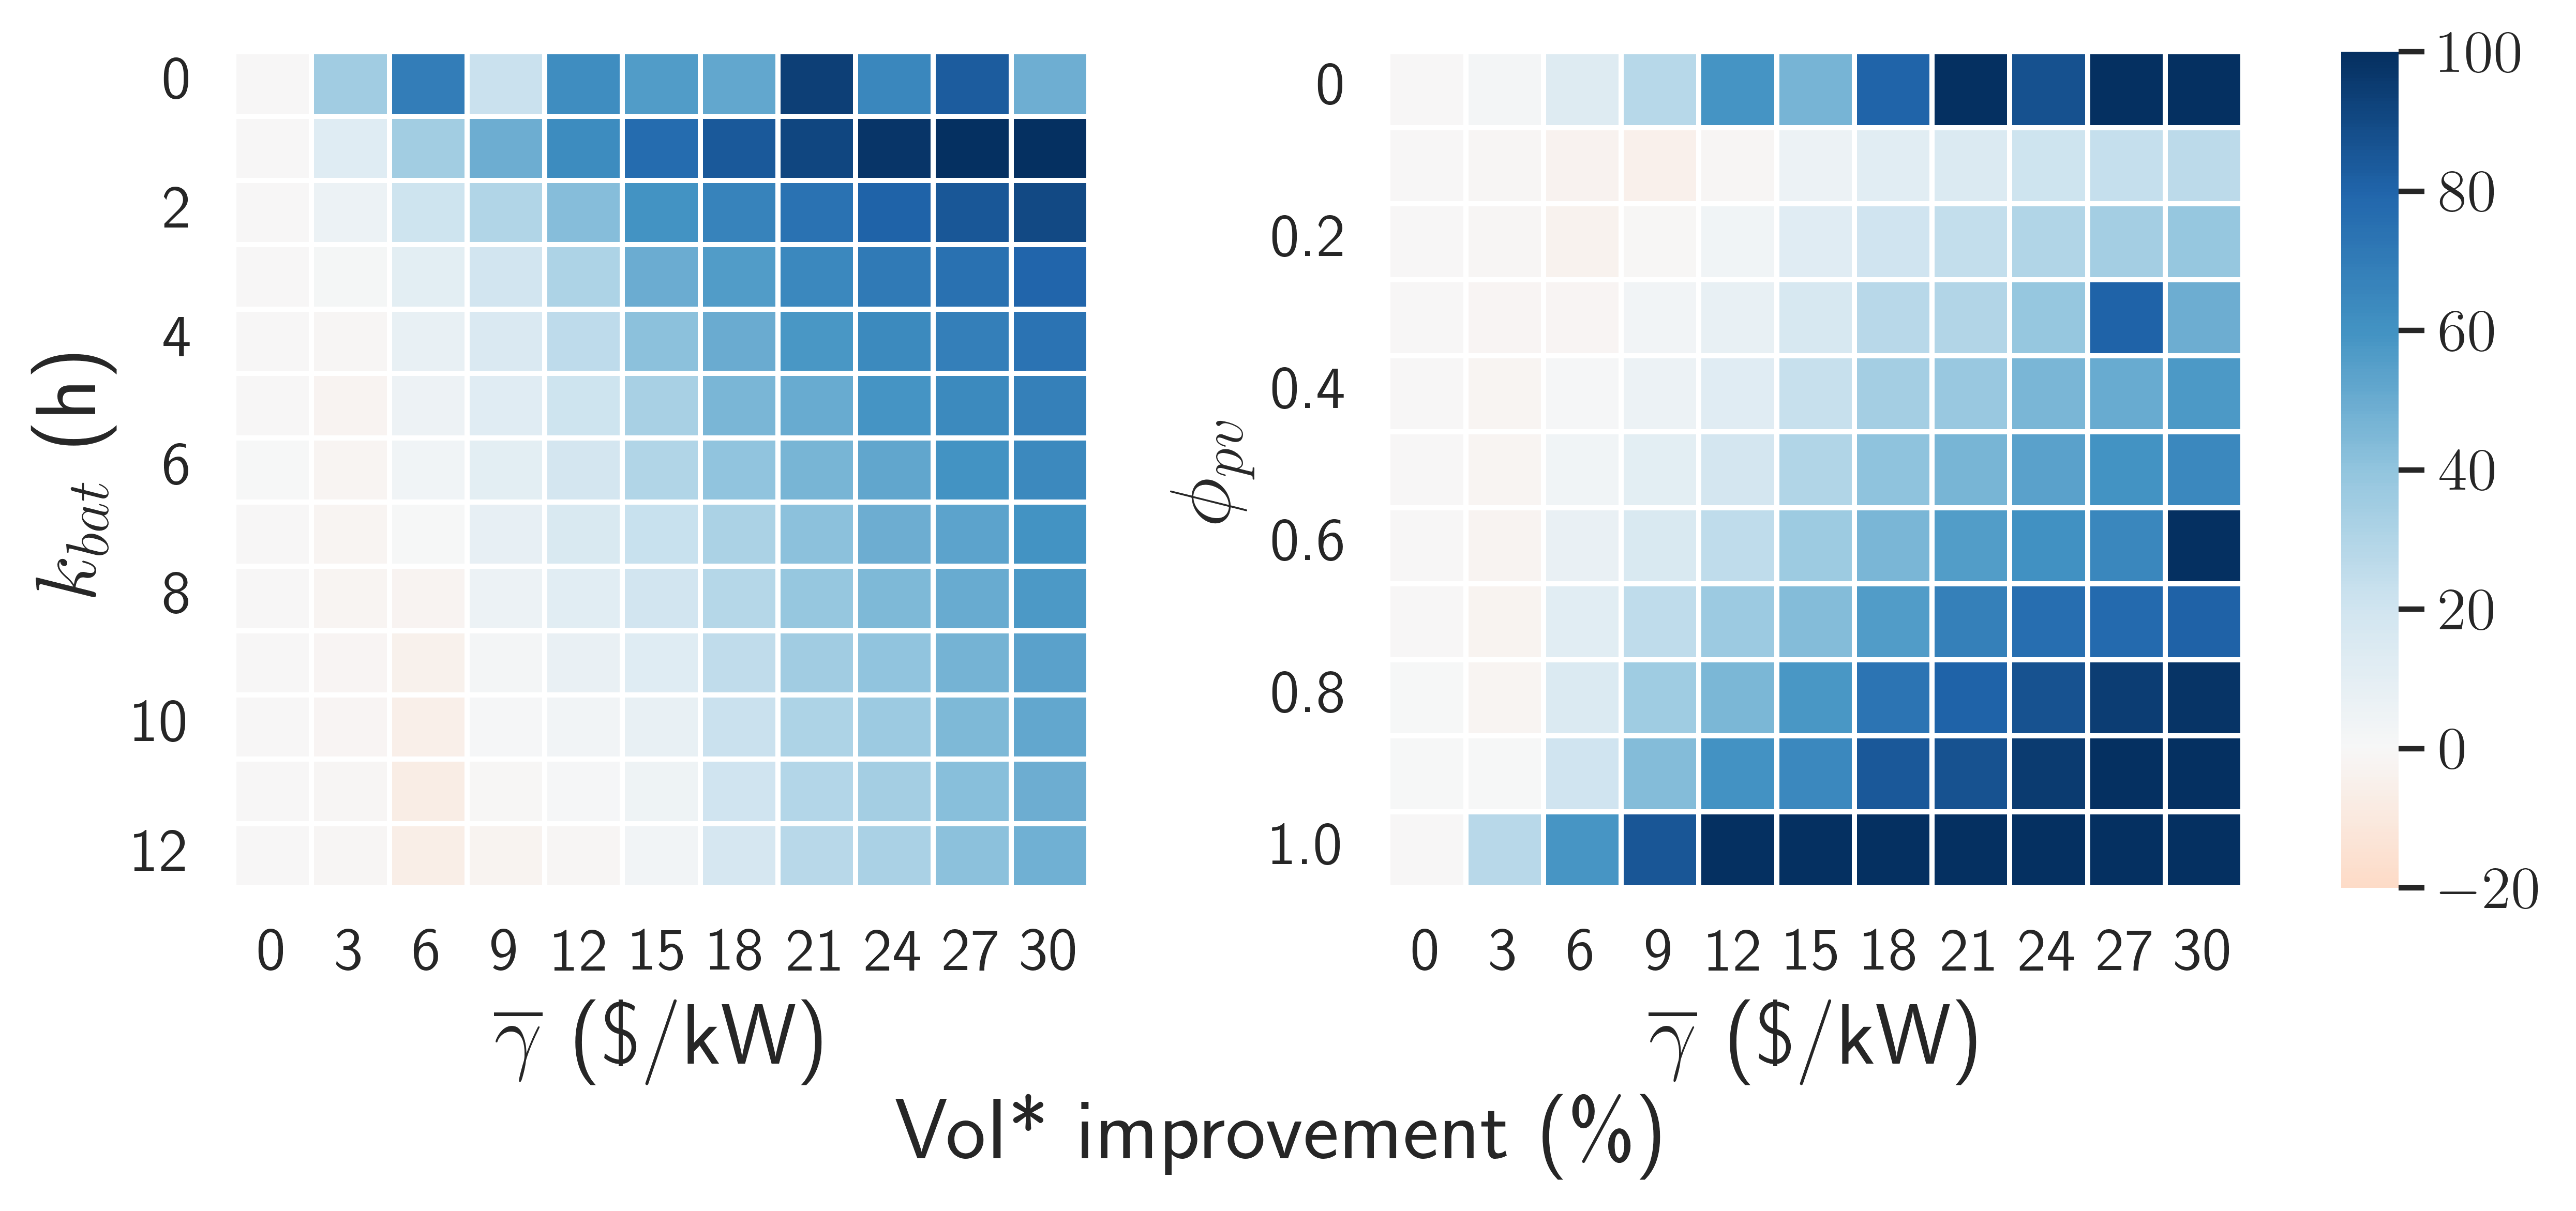

In [22]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(9, 3.5))  # 创建画布
grid = gridspec.GridSpec(2, 3,width_ratios=[1,1,0.06],height_ratios=[1.2,0.1])  # 设定2行*3列的网格
grid.update(wspace = 0.15, hspace = 0.1)

grid01=gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=grid[:,0:2],width_ratios=[1,1],wspace=0.35)
#ax1 = fig.add_subplot(grid[0, 1])  # pv_dc
ax2 = fig.add_subplot(grid01[:, 0])  # bat_pv
ax3 = fig.add_subplot(grid01[:, 1])  # bat_dc
ax4 = fig.add_subplot(grid[:, 2])  # 第一行的全部列都添加到ax1中
#ax5 = fig.add_subplot(grid[1, 2])  # 第一行的全部列都添加到ax1中

'''ax5.xaxis.set_ticks([])
ax5.yaxis.set_ticks([])
ax5.set_facecolor('bisque')
ax5.text(1,0.2,'$<$0',fontsize=15)'''

def truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100):
    '''truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100)'''
    cmapIn = plt.get_cmap(cmapIn)

    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),
        cmapIn(np.linspace(minval, maxval, n)))

    return new_cmap

#cmap=sns.truncate_colormap("RdBu",as_cmap=True)
#cmap.set_over('b')
#cmap.set_under('bisque')
cmap=truncate_colormap("RdBu",0.4,1,120)

#sns.heatmap(ax=ax1,data=pv_dc,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False,xticklabels=False) 
sns.heatmap(ax=ax2,data=dc_bat,square=False,vmin=-20,vmax=100,annot=False,cmap=cmap,linewidths=1,cbar=False) 
sns.heatmap(ax=ax3,data=pv_dc,square=False,vmin=-20,vmax=100,cmap=cmap,linewidths=1,cbar_ax=ax4 ) #cbar_kws={'ticks':[-20,0,100]}


ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.set_ylabel("$k_{bat} $ (h)",fontsize=20)
ax2.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)
ax2.set_yticklabels(labels=ax2.get_yticklabels(),rotation=0)

ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax3.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)
ax3.set_ylabel("$\phi_{pv}$",fontsize=20)
y_labels=['0','','0.2','','0.4','','0.6','','0.8','','1.0']
ax3.set_yticklabels(labels=y_labels,rotation=0)#labels=y_labels,


sns.set(font_scale=1.3)
plt.suptitle("VoI* improvement (\%)",y=-0.08,fontsize=20)

In [ ]:
bat_pv

pv_to_bld,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
B_kWh,,,,,,,,,,,
0,200.287115,126.921432,111.934362,105.750228,100.001019,81.318189,113.075943,70.017735,56.793074,43.048767,37.575890
1,142.629111,38.062667,54.823043,67.532269,76.522214,84.580609,94.162761,75.055510,53.539437,45.452079,37.388004
2,136.875612,25.546735,39.593339,48.955483,59.145194,66.659038,76.462339,80.787949,59.710466,47.938675,42.576254
3,90.932036,20.395357,29.640187,38.374422,47.196540,55.224632,65.262975,78.034843,73.586538,49.885876,44.164859
4,88.320476,16.117493,25.083590,33.167169,41.180624,49.801083,58.559157,71.524578,74.212692,60.070623,50.186457
5,99.812351,13.594893,22.294717,29.702166,37.342683,45.651698,54.698467,65.023732,75.043418,70.687774,58.615850
6,56.118198,11.380781,20.122010,27.431292,34.035105,40.402281,45.630279,56.098225,72.907896,88.134525,73.084030
7,59.043467,10.066051,19.777452,24.468121,26.493827,31.858299,41.189518,54.363312,65.501692,76.013086,85.041084
8,80.946003,9.964210,15.550875,18.467128,24.204498,28.864978,36.341044,46.392221,60.331602,71.256947,80.351128


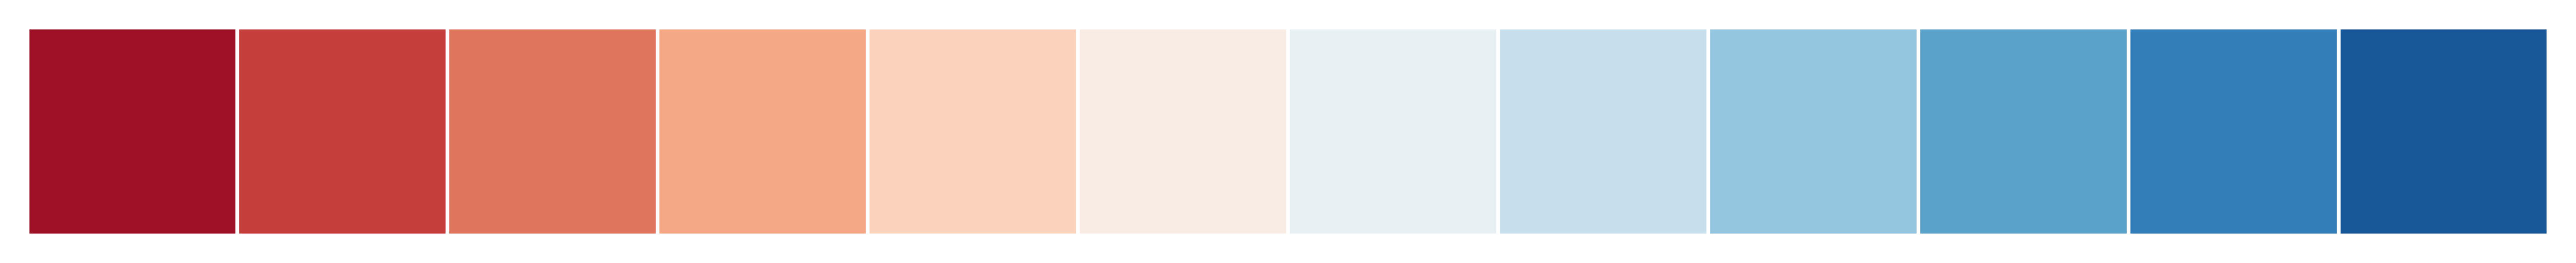

In [ ]:
sns.palplot(sns.color_palette("RdBu",12))


# Sensitivty for Simple PV


In [9]:
def cal_relative(df):
    lower_bound=df[(df.strategy=="optimal")&(df.pred_model=="GT")]["OPEX"].values[0]
    upper_bound=df[(df.strategy=="MSC")&(df.pred_model=="GT")]["OPEX"].values[0]
    diff=upper_bound-lower_bound
    df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
    enhance=df[(df.p_grid_max_method=="by_execution")&(df.pred_model=="Simple")]["relative_OPEX"].values[0]-\
        df[(df.p_grid_max_method=="minimize_cap")&(df.pred_model=="Simple")]["relative_OPEX"].values[0]
    
    return df

fn =r'L:\Coding_project\Energy_grid_new\output\experiments\simple_debug\Simple_pv_gridS_base.xlsx'
all_df=pd.read_excel(fn,sheet_name="Sheet1",index_col=0)
grouped=all_df.groupby(by='month_of_year').apply(cal_relative)

In [10]:
grouped

exp_alpha  pv_days  simple_bld  simple_pv  simple_ev   
month_of_year id                                                          
2             0         0.00        0       False       True      False  \
              1         0.00        0       False       True      False   
              8         0.10        2       False       True      False   
              9         0.10        3       False       True      False   
              10        0.25        2       False       True      False   
...                      ...      ...         ...        ...        ...   
11            279       0.45        5       False       True      False   
              286       0.50        4       False       True      False   
              287       0.50        4       False       True      False   
              294       0.50        5       False       True      False   
              295       0.50        5       False       True      False   

                   shift  pv_to_bld  price_dc  B_kWh status  ...    grid_max   
month_of_year id                                             ...               
2             0    False        0.5       0.6  441.6      D  ...  170.729649  \
              1    False        0.5       0.6  441.6      D  ...  191.689965   
              8    False        0.5       0.6  441.6      D  ...  418.451012   
              9    False        0.5       0.6  441.6      D  ...  418.451012   
              10   False        0.5       0.6  441.6      D  ...  414.383940   
...                  ...        ...       ...    ...    ...  ...         ...   
11            279  False        0.5       0.6  441.6      D  ...  237.977104   
              286  False        0.5       0.6  441.6      D  ...  422.949842   
              287  False        0.5       0.6  441.6      D  ...  238.261758   
              294  False        0.5       0.6  441.6      D  ...  422.949842   
              295  False        0.5       0.6  441.6      D  ...  238.261758   

                  import_cost export_revenue  bat_e_terminal   
month_of_year id                                               
2             0    247.033164   1.202209e-15        0.000000  \
              1    314.263885   2.301254e-16        0.000000   
              8    244.208214   2.763321e+00        0.000000   
              9    244.167445   2.744660e+00        0.000000   
              10   243.957253   2.793841e+00        0.000000   
...                       ...            ...             ...   
11            279  276.331615   1.562288e-01       17.178727   
              286  260.427349   1.128513e+00        0.000000   
              287  276.289906   1.553374e-01       17.178727   
              294  260.479587   1.158589e+00        0.000000   
              295  276.318725   1.767594e-01       17.178727   

                  bat_e_terminal_revenue load_bld_error_max_neg   
month_of_year id                                                  
2             0                 0.000000                      0  \
              1                 0.000000                      0   
              8                 0.000000                      0   
              9                 0.000000                      0   
              10                0.000000                      0   
...                                  ...                    ...   
11            279               0.097121                      0   
              286               0.000000                      0   
              287               0.097121                      0   
              294               0.000000                      0   
              295               0.097121                      0   

                   load_bld_error_max_pos  load_pv_error_max_neg   
month_of_year id                                                   
2             0                         0               0.000000  \
              1                         0               0.000000   
              8          

In [11]:
grouped.to_excel("simple_GS.xlsx")

# Simple bld metrics : weeks, exp_alpha

In [54]:
path=r'L:\Coding_project\Energy_grid_new\notebooks\metrics_simple_bld.xlsx'
data_simple_bld=pd.read_excel(path)

data=data_simple_bld.pivot(index='exp_alpha',columns='days_ahead')

In [55]:
data_simple_bld

,Unnamed: 0,days_ahead,exp_alpha,MAE_1,MAE_4,MAE_24,MAE_48,MAE_72,MAE_96
0,0,2,0.05,1.173763,2.115683,4.914841,5.386099,5.325819,5.283370
1,1,2,0.10,1.259128,2.232919,4.307527,4.702308,4.857215,4.943209
2,2,2,0.15,1.371081,2.405785,4.305204,4.719038,4.871511,4.954164
3,3,2,0.20,1.495980,2.596211,4.422002,4.787116,4.917113,4.988370
4,4,2,0.25,1.627684,2.787252,4.534406,4.845818,4.956263,5.017733
...,...,...,...,...,...,...,...,...,...
100,100,8,0.60,2.779098,4.278003,5.515789,5.662850,5.712051,5.738528
101,101,8,0.70,3.046319,4.510039,5.565747,5.687829,5.728704,5.751018
102,102,8,0.80,3.292843,4.699567,5.603409,5.706660,5.741258,5.760433
103,103,8,0.90,3.519123,4.855132,5.632668,5.721290,5.751010,5.767748


In [15]:
data['MAE_96']

exp_alpha,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.60,0.70,0.80,0.90,1.00
days_ahead,,,,,,,,,,,,,,,
2,5.283370,4.943209,4.954164,4.988370,5.017733,5.040704,5.058612,5.072827,5.084324,5.093774,5.108322,5.118936,5.126978,5.133253,5.138260
3,5.315419,4.973457,4.985069,5.020006,5.049888,5.073281,5.091571,5.106073,5.117775,5.127382,5.142158,5.152934,5.161093,5.167453,5.172526
4,5.338728,4.994302,5.005750,5.041032,5.071264,5.094897,5.113367,5.128017,5.139845,5.149560,5.164475,5.175343,5.183577,5.189990,5.195106
5,5.444083,5.119710,5.136468,5.174118,5.205770,5.230382,5.249563,5.264759,5.277008,5.287056,5.302478,5.313714,5.322217,5.328840,5.334119
6,5.542169,5.234396,5.255896,5.295925,5.329034,5.354632,5.374510,5.390229,5.402892,5.413271,5.429195,5.440790,5.449554,5.456382,5.461822
7,5.657069,5.377485,5.407689,5.451975,5.487571,5.514773,5.535774,5.552301,5.565581,5.576445,5.593089,5.605170,5.614291,5.621383,5.627029
8,5.760519,5.504344,5.542542,5.590770,5.628535,5.657107,5.679031,5.696231,5.710029,5.721297,5.738528,5.751018,5.760433,5.767748,5.773569


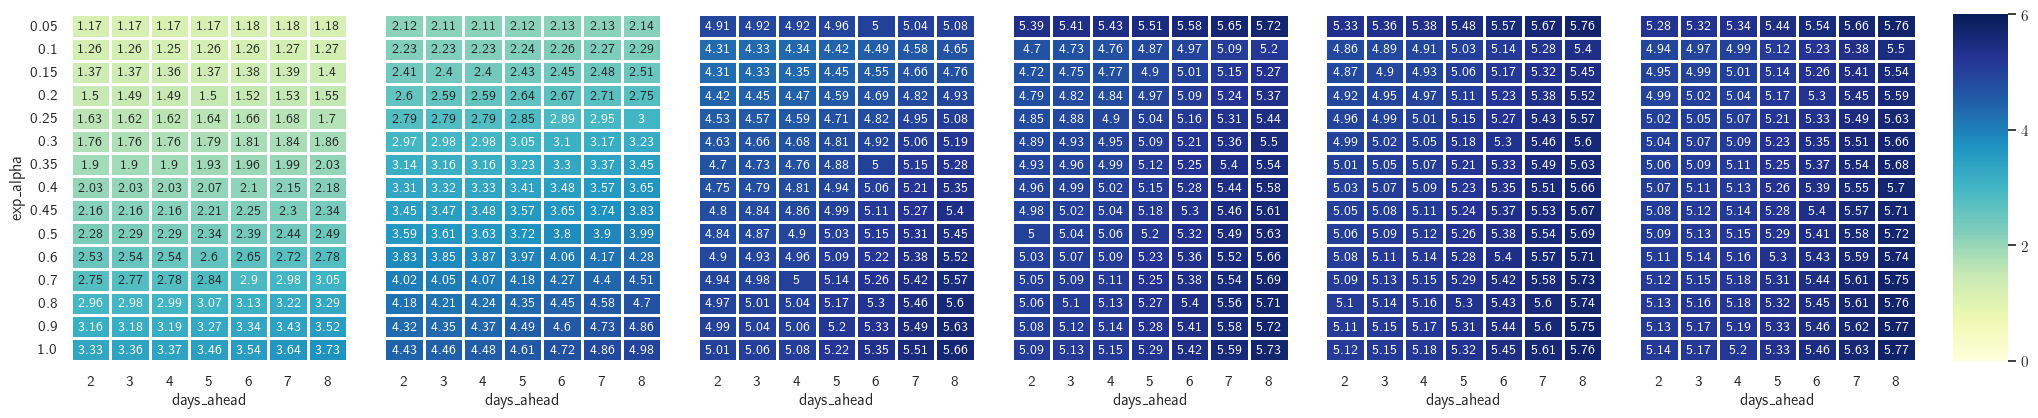

In [37]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

rc_={
    "figure.dpi":100,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
plt.rcParams.update(rc_)


fig = plt.figure(figsize=(25, 4.5))  # 创建画布
grid = gridspec.GridSpec(1, 7,width_ratios=[1,1,1,1,1,1,0.2],height_ratios=[1.2])  # 设定2行*3列的网格
grid.update(wspace = 0.15, hspace = 0.1)

grid01=gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=grid[:,0:2],width_ratios=[1,1],wspace=0.35)

ax1 = fig.add_subplot(grid[:, 0])  #
ax2 = fig.add_subplot(grid[:, 1])  # 
ax3 = fig.add_subplot(grid[:, 2])  # 
ax4 = fig.add_subplot(grid[:, 3])  # 
ax5 = fig.add_subplot(grid[:, 4])  # 
ax6 = fig.add_subplot(grid[:, 5])  # 
ax7 = fig.add_subplot(grid[:, 6])  # 


def truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100):
    '''truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100)'''
    cmapIn = plt.get_cmap(cmapIn)

    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),
        cmapIn(np.linspace(minval, maxval, n)))

    return new_cmap

#cmap=truncate_colormap("RdBu",0.4,1,120)
cmap='YlGnBu'

#sns.heatmap(ax=ax1,data=pv_dc,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False,xticklabels=False) 
sns.heatmap(ax=ax1,data=data['MAE_1'],square=False,vmin=0,vmax=6,annot=True,cmap=cmap,linewidths=1,cbar=False,fmt=".3g") 
sns.heatmap(ax=ax2,data=data['MAE_4'],square=False,vmin=0,vmax=6,annot=True,cmap=cmap,linewidths=1,cbar=False,fmt=".3g") 
sns.heatmap(ax=ax3,data=data['MAE_24'],square=False,vmin=0,vmax=6,annot=True,cmap=cmap,linewidths=1,cbar=False,fmt=".3g") 
sns.heatmap(ax=ax4,data=data['MAE_48'],square=False,vmin=0,vmax=6,annot=True,cmap=cmap,linewidths=1,cbar=False,fmt=".3g") 
sns.heatmap(ax=ax5,data=data['MAE_72'],square=False,vmin=0,vmax=6,annot=True,cmap=cmap,linewidths=1,cbar=False,fmt=".3g") 
sns.heatmap(ax=ax6,data=data['MAE_96'],square=False,vmin=0,vmax=6,annot=True,cmap=cmap,linewidths=1, cbar_ax=ax7, fmt=".3g") #cbar_kws={'ticks':[-20,0,100]}cbar_ax=ax4
for ax in [ax2,ax3,ax4,ax5,ax6]:
    ax.set(ylabel=None)
    ax.set_yticklabels(labels=[])


'''ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.set_ylabel("$k_{bat} $ (h)",fontsize=20)
ax2.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)
ax2.set_yticklabels(labels=ax2.get_yticklabels(),rotation=0)

ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax3.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)
ax3.set_ylabel("$\phi_{pv}$",fontsize=20)'''
#y_labels=['0','','0.2','','0.4','','0.6','','0.8','','1.0']
#ax3.set_yticklabels(labels=y_labels,rotation=0)#labels=y_labels,


sns.set(font_scale=2)
#plt.suptitle("VoI* improvement (\%)",y=-0.08,fontsize=20)

# Simple pv metrics : weeks, exp_alpha

In [57]:
path=r'L:\Coding_project\Energy_grid_new\notebooks\metrics_simple_pv.xlsx'
data_simple_pv=pd.read_excel(path)

data=data_simple_pv.pivot(index='exp_alpha',columns='days_ahead')

In [58]:
data_simple_pv

,days_ahead,exp_alpha,MAE_1,MAE_4,MAE_24,MAE_48,MAE_72,MAE_96
0,3,0.1,31.956901,62.255837,112.078853,105.457210,100.016449,97.081792
1,3,0.2,33.695141,59.809205,86.921531,87.557792,87.772404,87.894526
2,3,0.3,36.562493,60.994118,83.478197,85.661333,86.506739,86.945276
3,3,0.4,39.852131,63.416719,83.391834,85.609354,86.472079,86.919280
4,3,0.5,43.259842,66.160804,83.882360,85.854083,86.635232,87.041645
...,...,...,...,...,...,...,...,...
280,21,1.1,63.683150,81.644997,90.043167,90.916969,91.338463,91.565961
281,21,1.2,66.213395,82.900276,90.258357,91.024564,91.410193,91.619758
282,21,1.3,68.535337,83.975016,90.440983,91.115877,91.471068,91.665415
283,21,1.4,70.659866,84.898238,90.596911,91.193841,91.523044,91.704397


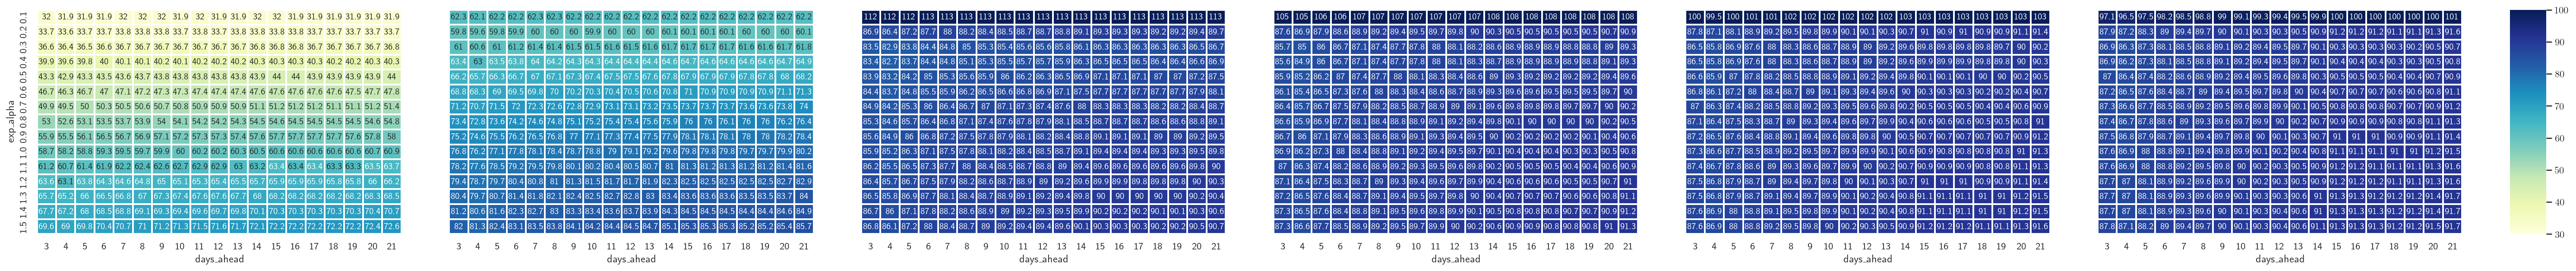

In [61]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

rc_={
    "figure.dpi":150,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
plt.rcParams.update(rc_)


fig = plt.figure(figsize=(50, 4.5))  # 创建画布
grid = gridspec.GridSpec(1, 7,width_ratios=[1,1,1,1,1,1,0.1],height_ratios=[1.2])  # 设定2行*3列的网格
grid.update(wspace = 0.15, hspace = 0.1)

grid01=gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=grid[:,0:2],width_ratios=[1,1],wspace=0.35)

ax1 = fig.add_subplot(grid[:, 0])  #
ax2 = fig.add_subplot(grid[:, 1])  # 
ax3 = fig.add_subplot(grid[:, 2])  # 
ax4 = fig.add_subplot(grid[:, 3])  # 
ax5 = fig.add_subplot(grid[:, 4])  # 
ax6 = fig.add_subplot(grid[:, 5])  # 
ax7 = fig.add_subplot(grid[:, 6])  # 


def truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100):
    '''truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100)'''
    cmapIn = plt.get_cmap(cmapIn)

    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),
        cmapIn(np.linspace(minval, maxval, n)))

    return new_cmap

#cmap=truncate_colormap("RdBu",0.4,1,120)
cmap='YlGnBu'
vmin=30
vmax=100
#sns.heatmap(ax=ax1,data=pv_dc,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False,xticklabels=False) 
sns.heatmap(ax=ax1,data=data['MAE_1'],square=False,vmin=vmin,vmax=vmax,annot=True,cmap=cmap,linewidths=1,cbar=False,fmt=".3g") 
sns.heatmap(ax=ax2,data=data['MAE_4'],square=False,vmin=vmin,vmax=vmax,annot=True,cmap=cmap,linewidths=1,cbar=False,fmt=".3g") 
sns.heatmap(ax=ax3,data=data['MAE_24'],square=False,vmin=vmin,vmax=vmax,annot=True,cmap=cmap,linewidths=1,cbar=False,fmt=".3g") 
sns.heatmap(ax=ax4,data=data['MAE_48'],square=False,vmin=vmin,vmax=vmax,annot=True,cmap=cmap,linewidths=1,cbar=False,fmt=".3g") 
sns.heatmap(ax=ax5,data=data['MAE_72'],square=False,vmin=vmin,vmax=vmax,annot=True,cmap=cmap,linewidths=1,cbar=False,fmt=".3g") 
sns.heatmap(ax=ax6,data=data['MAE_96'],square=False,vmin=vmin,vmax=vmax,annot=True,cmap=cmap,linewidths=1, cbar_ax=ax7, fmt=".3g") #cbar_kws={'ticks':[-20,0,100]}cbar_ax=ax4
for ax in [ax2,ax3,ax4,ax5,ax6]:
    ax.set(ylabel=None)
    ax.set_yticklabels(labels=[])


'''ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.set_ylabel("$k_{bat} $ (h)",fontsize=20)
ax2.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)
ax2.set_yticklabels(labels=ax2.get_yticklabels(),rotation=0)

ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax3.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)
ax3.set_ylabel("$\phi_{pv}$",fontsize=20)'''
#y_labels=['0','','0.2','','0.4','','0.6','','0.8','','1.0']
#ax3.set_yticklabels(labels=y_labels,rotation=0)#labels=y_labels,


sns.set(font_scale=1)
#plt.suptitle("VoI* improvement (\%)",y=-0.08,fontsize=20)

   strategy pred_model  month_of_year        OPEX       days   
0       MPC         GT              1  351.736018  30.989583  \
1       MSC         GT              1  439.063607  30.989583   
2       MPC  Heuristic              1  455.803893  30.989583   
3       MPC  Heuristic              1  394.424020  30.989583   
4       MPC         GT              2  349.738688  27.989583   
5       MSC         GT              2  429.277864  27.989583   
6       MPC  Heuristic              2  457.124504  27.989583   
7       MPC  Heuristic              2  391.102794  27.989583   
8       MPC         GT              3  289.073887  30.989583   
9       MSC         GT              3  359.622529  30.989583   
10      MPC  Heuristic              3  413.581373  30.989583   
11      MPC  Heuristic              3  340.617030  30.989583   
12      MPC         GT              4  295.912527  29.989583   
13      MSC         GT              4  386.173351  29.989583   
14      MPC  Heuristic              4  4

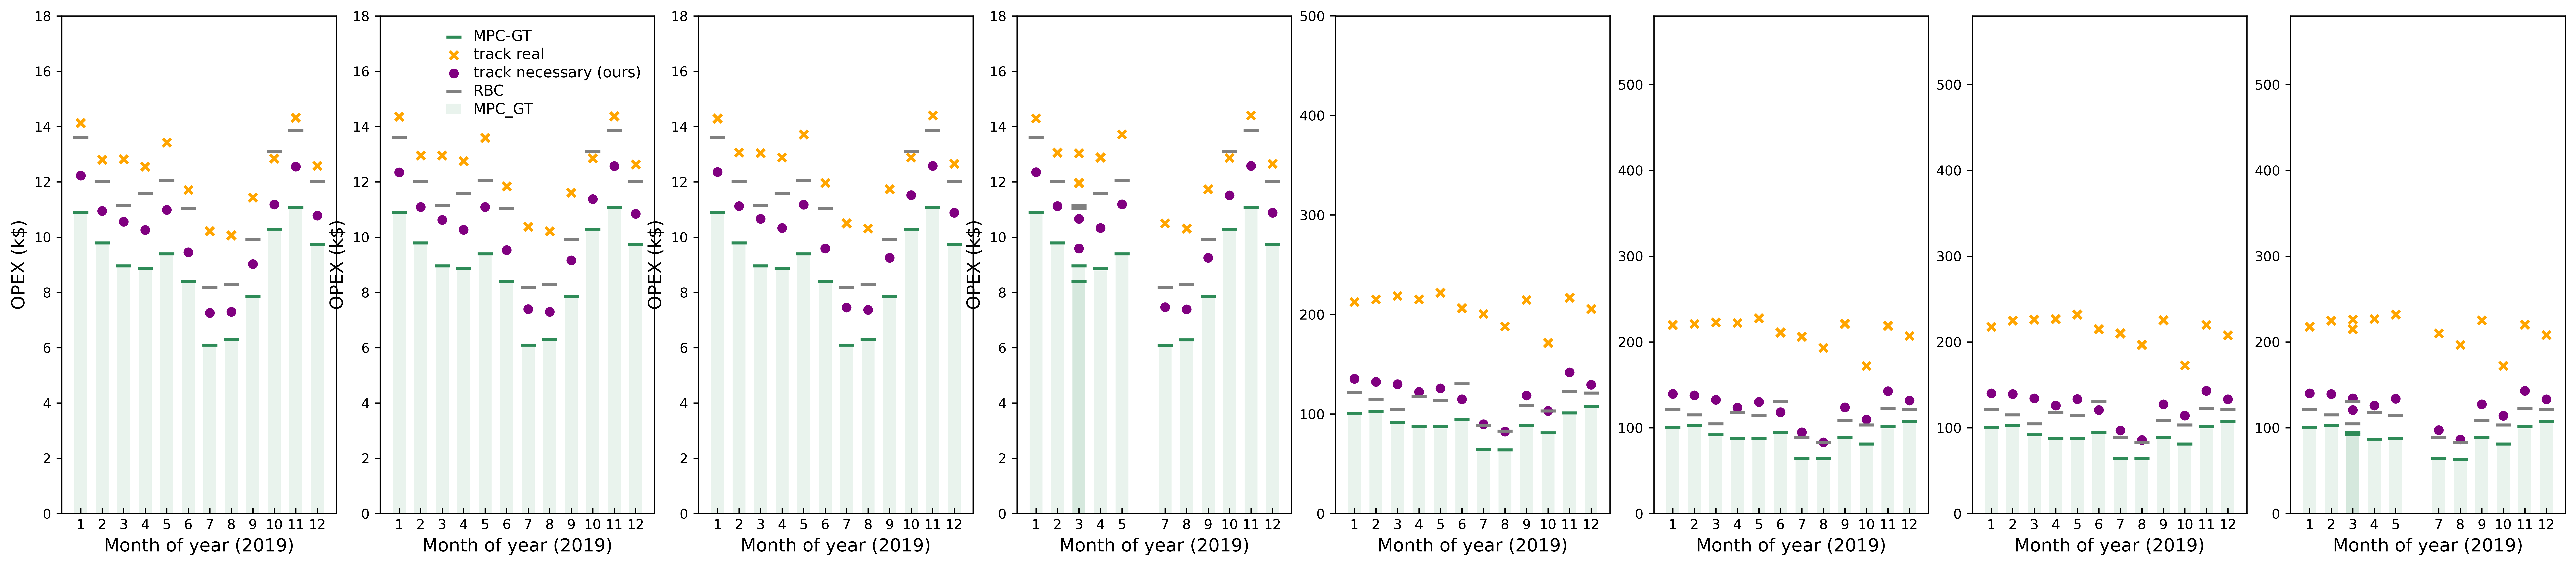

In [ ]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 6))  # 创建画布
grid = gridspec.GridSpec(1, 8)  # width_ratios=[1,1,1,1],height_ratios=[1]
grid.update(wspace =0.16, hspace = 0.18)

ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])  
ax3 = fig.add_subplot(grid[0,2])  
ax4 = fig.add_subplot(grid[0,3])  
ax5 = fig.add_subplot(grid[0,4])  
ax6 = fig.add_subplot(grid[0,5]) 
ax7 = fig.add_subplot(grid[0,6])  
ax8 = fig.add_subplot(grid[0,7]) 


#########################################################################################
############################################################################################  
path=r"L:\Coding_project\Energy_grid_new\output\experiments\simple_debug\pred_pv_alpha0.3.xlsx"
df_dc=pd.read_excel(path)
df_opex_03=pre_process(df_dc,'OPEX','month_of_year')
df_p_grid_03=pre_process(df_dc,'demand_charge','month_of_year')

path=r"L:\Coding_project\Energy_grid_new\output\experiments\simple_debug\pred_pv_alpha0.4.xlsx"
df_dc=pd.read_excel(path)
df_opex_04=pre_process(df_dc,'OPEX','month_of_year')
df_p_grid_04=pre_process(df_dc,'demand_charge','month_of_year')

path=r"L:\Coding_project\Energy_grid_new\output\experiments\simple_debug\pred_pv_alpha0.5.xlsx"
df_dc=pd.read_excel(path)
df_opex_05=pre_process(df_dc,'OPEX','month_of_year')
df_p_grid_05=pre_process(df_dc,'demand_charge','month_of_year')


path=r"L:\Coding_project\Energy_grid_new\output\experiments\simple_debug\pred_pv_alpha0.5_4days.xlsx"
df_dc=pd.read_excel(path)
df_opex_10=pre_process(df_dc,'OPEX','month_of_year')
df_p_grid_10=pre_process(df_dc,'demand_charge','month_of_year')

plot_params={
    "subplots":{
        "0":{
            "df":df_opex_03,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"",
            "limit":[0,18],
            "relative":False,
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                },
            "plot_arrow":True,
            "arrow_start":'MPC-Heuristic',
            "arrow_end":'MPC-Heuristic-our-method',
            },
        "4":{
            "df":df_p_grid_03,           
            "key":"demand_charge",
            "duration_key":"month_of_year",
            "subtitle":"",
            "limit":[0,500],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                },
            "plot_arrow":True,
            "arrow_start":'MPC-Heuristic',
            "arrow_end":'MPC-Heuristic-our-method'
            },
        "1":{
            "df":df_opex_04,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"",
            "limit":[0,18],
            "relative":False,
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                },
            "plot_arrow":True,
            "arrow_start":'MPC-Heuristic',
            "arrow_end":'MPC-Heuristic-our-method',
            },
        "5":{
            "df":df_p_grid_04,           
            "key":"demand_charge",
            "duration_key":"month_of_year",
            "subtitle":"",
            "limit":[0,580],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                },
            "plot_arrow":True,
            "arrow_start":'MPC-Heuristic',
            "arrow_end":'MPC-Heuristic-our-method'
            },
        "2":{
            "df":df_opex_05,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"",
            "limit":[0,18],
            "relative":False,
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                },
            "plot_arrow":True,
            "arrow_start":'MPC-Heuristic',
            "arrow_end":'MPC-Heuristic-our-method',
            },
        "6":{
            "df":df_p_grid_05,           
            "key":"demand_charge",
            "duration_key":"month_of_year",
            "subtitle":"",
            "limit":[0,580],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                },
            "plot_arrow":True,
            "arrow_start":'MPC-Heuristic',
            "arrow_end":'MPC-Heuristic-our-method'
            },
        "3":{
            "df":df_opex_10,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"",
            "limit":[0,18],
            "relative":False,
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                },
            "plot_arrow":True,
            "arrow_start":'MPC-Heuristic',
            "arrow_end":'MPC-Heuristic-our-method',
            },
        
        "7":{
            "df":df_p_grid_10,           
            "key":"demand_charge",
            "duration_key":"month_of_year",
            "subtitle":"",
            "limit":[0,580],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                },
            "plot_arrow":True,
            "arrow_start":'MPC-Heuristic',
            "arrow_end":'MPC-Heuristic-our-method'
            }
        },
    "group_plot":[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8],
    "labels_not_show":[],
    "relative":False,
    "fontsize":10,
    "n_subplots":8,
    "figsize":(10,8),
    "show_notes":False,
    "marker_s":100,
    "sharey":False,
    "show_line":False,
    "bbox_to_anchor":(1,1),
    "save_fn":None,
    "suptitle":None
}

r_opex_month_6dc=mplot_origin_valid_bar(plot_params)